In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
def sample_name(s: str) -> str:
    for sfx in ["_rep1", "_rep2", "-singleplex", "-multiplex"]:
        s = s.replace(sfx, "")
    return s

In [3]:
with open("../../docs/final_samples.csv") as fp:
    final_samples = set(fp.read().splitlines()) 
len(final_samples)

72

In [4]:
smear_df = pd.read_csv("../../docs/smear_results.csv", index_col="sample")

In [5]:
ont_df = pd.read_csv("../../docs/ont_samples.csv", index_col="sample")

In [6]:
ont_comp_df = pd.read_html("../../results/report/nanopore_composition.html")
assert len(ont_comp_df) == 1
ont_comp_df = ont_comp_df[0]
ont_comp_df.columns = [t[1] if t[0].startswith("Unnam") else t[0] for t in ont_comp_df.columns]
ont_comp_df["source"] = "sputum"
ont_comp_df["technology"] = "nanopore"
ont_comp_df["smear"] = [smear_df.at[sample_name(s), "smear_result"] for s in ont_comp_df["sample"]]
ont_comp_df["is_multiplex"] = [not pd.isna(ont_df.at[s, "barcode_kit"]) for s in  ont_comp_df["sample"]]
ont_comp_df

,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear,is_multiplex
0,P201,895,0.11%,644877,77.08%,190847,22.81%,836619,0.2,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
1,P202,24865,1.83%,1153816,85.11%,176981,13.05%,1355662,6.0,1.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,True
2,P203-multiplex,3768,0.46%,783301,95.23%,35497,4.32%,822566,1.1,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
3,P203-singleplex,19938,0.45%,4257677,96.47%,136039,3.08%,4413654,6.6,4.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,False
4,P204,414,0.07%,57693,10.05%,515903,89.88%,574010,0.1,Unknown,Unknown,sputum,nanopore,+,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Test_NC3-multiplex,82,0.00%,1772527,97.04%,54063,2.96%,1826672,0.1,Unknown,Unknown,sputum,nanopore,-,True
86,Test_NC3-singleplex,449,0.01%,6131584,93.09%,454684,6.90%,6586717,0.5,Unknown,Unknown,sputum,nanopore,-,False
87,Test_NC4,3,0.00%,99976,92.87%,7675,7.13%,107654,0.0,Unknown,Unknown,sputum,nanopore,-,False
88,Test_NC5,420,0.01%,4961078,93.59%,339156,6.40%,5300654,0.4,Unknown,Unknown,sputum,nanopore,-,False


In [7]:
illumina_df1 = pd.read_html("../../results/report/illumina_culture_composition.html")
assert len(illumina_df1) == 1
illumina_df1 = illumina_df1[0]
illumina_df1.columns = [t[1] if t[0].startswith("Unnam") else t[0] for t in illumina_df1.columns]
illumina_df1["source"] = "culture"
illumina_df1["technology"] = "illumina"
illumina_df1["smear"] = [smear_df.at[sample_name(s), "smear_result"] for s in illumina_df1["sample"]]
# illumina_df1

In [8]:
illumina_df2 = pd.read_html("../../results/report/illumina_sputum_composition.html")
assert len(illumina_df2) == 1
illumina_df2 = illumina_df2[0]
illumina_df2.columns = [t[1] if t[0].startswith("Unnam") else t[0] for t in illumina_df2.columns]
illumina_df2["source"] = "sputum"
illumina_df2["technology"] = "illumina"
illumina_df2["smear"] = [smear_df.at[sample_name(s), "smear_result"] for s in illumina_df2["sample"]]
# illumina_df2

In [9]:
comp_df = pd.concat([ont_comp_df, illumina_df1, illumina_df2])
comp_df.reset_index(inplace=True)
# remove replicates
comp_df = comp_df.loc[~comp_df["sample"].str.contains("_rep")]
comp_df["sample"] = [s.split("-s")[0].split("-m")[0] for s in comp_df["sample"]]
comp_df["is_multiplex"].fillna(False, inplace=True)
comp_df

,index,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear,is_multiplex
0,0,P201,895,0.11%,644877,77.08%,190847,22.81%,836619,0.2,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
1,1,P202,24865,1.83%,1153816,85.11%,176981,13.05%,1355662,6.0,1.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,True
2,2,P203,3768,0.46%,783301,95.23%,35497,4.32%,822566,1.1,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
3,3,P203,19938,0.45%,4257677,96.47%,136039,3.08%,4413654,6.6,4.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,False
4,4,P204,414,0.07%,57693,10.05%,515903,89.88%,574010,0.1,Unknown,Unknown,sputum,nanopore,+,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,85,Test_NC2,7555,0.37%,1977115,96.53%,63620,3.11%,2048290,0.5,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False
231,86,Test_NC3,22874,1.04%,2080051,94.85%,89957,4.10%,2192882,1.5,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False
232,87,Test_NC4,14074,1.00%,1316174,93.65%,75229,5.35%,1405477,0.9,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False
233,88,Test_NC5,28061,1.61%,1554571,88.97%,164633,9.42%,1747265,1.9,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False


In [10]:
comp_df.query("sample in @final_samples", inplace=True)

In [11]:
comp_df

,index,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear,is_multiplex
0,0,P201,895,0.11%,644877,77.08%,190847,22.81%,836619,0.2,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
1,1,P202,24865,1.83%,1153816,85.11%,176981,13.05%,1355662,6.0,1.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,True
2,2,P203,3768,0.46%,783301,95.23%,35497,4.32%,822566,1.1,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
3,3,P203,19938,0.45%,4257677,96.47%,136039,3.08%,4413654,6.6,4.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,False
4,4,P204,414,0.07%,57693,10.05%,515903,89.88%,574010,0.1,Unknown,Unknown,sputum,nanopore,+,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,85,Test_NC2,7555,0.37%,1977115,96.53%,63620,3.11%,2048290,0.5,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False
231,86,Test_NC3,22874,1.04%,2080051,94.85%,89957,4.10%,2192882,1.5,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False
232,87,Test_NC4,14074,1.00%,1316174,93.65%,75229,5.35%,1405477,0.9,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False
233,88,Test_NC5,28061,1.61%,1554571,88.97%,164633,9.42%,1747265,1.9,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False


In [12]:
comp_df.query("source=='sputum' and coverage > 50")

,index,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear,is_multiplex
35,35,P230,199920,2.29%,4052678,46.45%,4471653,51.26%,8724251,59.2,3.1.1,Mycobacterium_tuberculosis,sputum,nanopore,+++,False
49,49,Test_19,258960,1.83%,11781805,83.42%,2082754,14.75%,14123519,108.8,3.1.1,Mycobacterium_tuberculosis,sputum,nanopore,+,False
62,62,Test_41,301991,2.03%,13644171,91.76%,922534,6.20%,14868696,119.3,4.10,Mycobacterium_tuberculosis,sputum,nanopore,++,False
180,35,P224,2528015,37.03%,3365415,49.30%,933483,13.67%,6826913,100.0,4.1.2.1,Mycobacterium_tuberculosis,sputum,illumina,+++,False


In [33]:
lineage_reference = {}
for i, row in comp_df.query("source=='culture'").iterrows():
    lineage_reference[row["sample"]] = row["lineage"]

In [34]:
lineage_reference

{'P202': '1.1.2',
 'P203': '4.1.2',
 'P204': '4.1.1.3',
 'P205': '1.1.2',
 'P209': '1.1.2',
 'P210': '2.2.7',
 'P211': '2.2.4',
 'P212': '1.1.2',
 'P214': '1.1.2',
 'P215': '3.1.1',
 'P216': '4.1.2.1',
 'P217': '3.1.1',
 'P218': '4.1.2.1',
 'P221': '1.1.2',
 'P222': '4.4.1.1',
 'P223': '2.2.6',
 'P224': '4.1.2.1',
 'P225': '4.10',
 'P226': '2.2.7',
 'P227': '1.1.2',
 'P228': '4.10',
 'P229': '1.1.2',
 'P230': '3.1.1',
 'Test_15': '4.10',
 'Test_16': '4.10',
 'Test_19': '3.1.1',
 'Test_20': '3',
 'Test_22': '2.2',
 'Test_23': '1.2.2',
 'Test_28': '3',
 'Test_32': '2.2.6',
 'Test_34': '2.2.6',
 'Test_36': '4.3.3',
 'Test_37': '3.1.2.1',
 'Test_38': '1.2.2',
 'Test_40': '2.2.6',
 'Test_41': '4.10',
 'Test_43': '4.3.4.1',
 'Test_45': '4.10',
 'Test_46': '3',
 'Test_47': '4.3.4.1',
 'Test_48': '3',
 'Test_51': '2.2.3',
 'Test_56': '2.2.8'}

In [35]:
sputum_df = comp_df.query("source=='sputum'")

In [36]:
sputum_df.query("technology=='nanopore' and is_multiplex==True")

,index,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear,is_multiplex
0,0,P201,895,0.11%,644877,77.08%,190847,22.81%,836619,0.2,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
1,1,P202,24865,1.83%,1153816,85.11%,176981,13.05%,1355662,6.0,1.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,True
2,2,P203,3768,0.46%,783301,95.23%,35497,4.32%,822566,1.1,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
4,4,P204,414,0.07%,57693,10.05%,515903,89.88%,574010,0.1,Unknown,Unknown,sputum,nanopore,+,True
5,5,P205,2439,0.29%,539209,64.78%,290746,34.93%,832394,0.7,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True
12,12,P211,1135,0.17%,209837,32.13%,442034,67.69%,653006,0.3,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,++,True
14,14,P212,3311,0.28%,1061073,89.80%,117176,9.92%,1181560,0.6,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,++,True
15,15,P213,298,0.07%,426939,98.03%,8296,1.90%,435533,0.1,Unknown,Unknown,sputum,nanopore,++,True
17,17,P214,1810,0.19%,804599,84.54%,145274,15.26%,951683,0.5,Unknown,Mycobacterium_africanum,sputum,nanopore,++,True
18,18,P215,3564,0.58%,532283,86.96%,76255,12.46%,612102,1.1,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,++,True


In [37]:
correct_major = []
correct_full = []
for i, row in sputum_df.iterrows():
    lin = row["lineage"]
    sample = row["sample"]
    reflin = lineage_reference.get(sample)
    
    species = row["species"]
    if species != "Mycobacterium_tuberculosis":
        lin = "Unknown"
    
    if reflin is None:
        correct_full.append(None)
        correct_major.append(None)
    else:
        correct_full.append(reflin == lin)
        correct_major.append(reflin[0] == lin[0])

In [38]:
sputum_df["correct_major"] = correct_major
sputum_df["correct_full"] = correct_full

/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_75275/3384558527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sputum_df["correct_major"] = correct_major
/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_75275/3384558527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sputum_df["correct_full"] = correct_full


In [39]:
sputum_df

,index,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear,is_multiplex,correct_major,correct_full
0,0,P201,895,0.11%,644877,77.08%,190847,22.81%,836619,0.2,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True,None,None
1,1,P202,24865,1.83%,1153816,85.11%,176981,13.05%,1355662,6.0,1.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,True,True,True
2,2,P203,3768,0.46%,783301,95.23%,35497,4.32%,822566,1.1,Unknown,Mycobacterium_tuberculosis,sputum,nanopore,+,True,False,False
3,3,P203,19938,0.45%,4257677,96.47%,136039,3.08%,4413654,6.6,4.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+,False,True,True
4,4,P204,414,0.07%,57693,10.05%,515903,89.88%,574010,0.1,Unknown,Unknown,sputum,nanopore,+,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,85,Test_NC2,7555,0.37%,1977115,96.53%,63620,3.11%,2048290,0.5,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False,None,None
231,86,Test_NC3,22874,1.04%,2080051,94.85%,89957,4.10%,2192882,1.5,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False,None,None
232,87,Test_NC4,14074,1.00%,1316174,93.65%,75229,5.35%,1405477,0.9,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False,None,None
233,88,Test_NC5,28061,1.61%,1554571,88.97%,164633,9.42%,1747265,1.9,Unknown,Mycobacterium_tuberculosis,sputum,illumina,-,False,None,None


In [40]:
sputum_df.groupby(["technology", "source", "correct_full"])["sample"].count()

technology  source  correct_full
illumina    sputum  False           27
                    True            16
nanopore    sputum  False           34
                    True            19
Name: sample, dtype: int64

In [41]:
sputum_df.groupby(["technology", "source", "correct_major"])["sample"].count()

technology  source  correct_major
illumina    sputum  False            27
                    True             16
nanopore    sputum  False            33
                    True             20
Name: sample, dtype: int64

In [42]:
sputum_df.groupby(["technology", "source", "correct_major", "smear"])["sample"].count()

technology  source  correct_major  smear
illumina    sputum  False          +         6
                                   ++       11
                                   +++      10
                    True           +         5
                                   ++        4
                                   +++       7
nanopore    sputum  False          +         8
                                   ++       12
                                   +++      13
                    True           +         5
                                   ++        6
                                   +++       9
Name: sample, dtype: int64

In [43]:
data = sputum_df.query("smear!='-'")

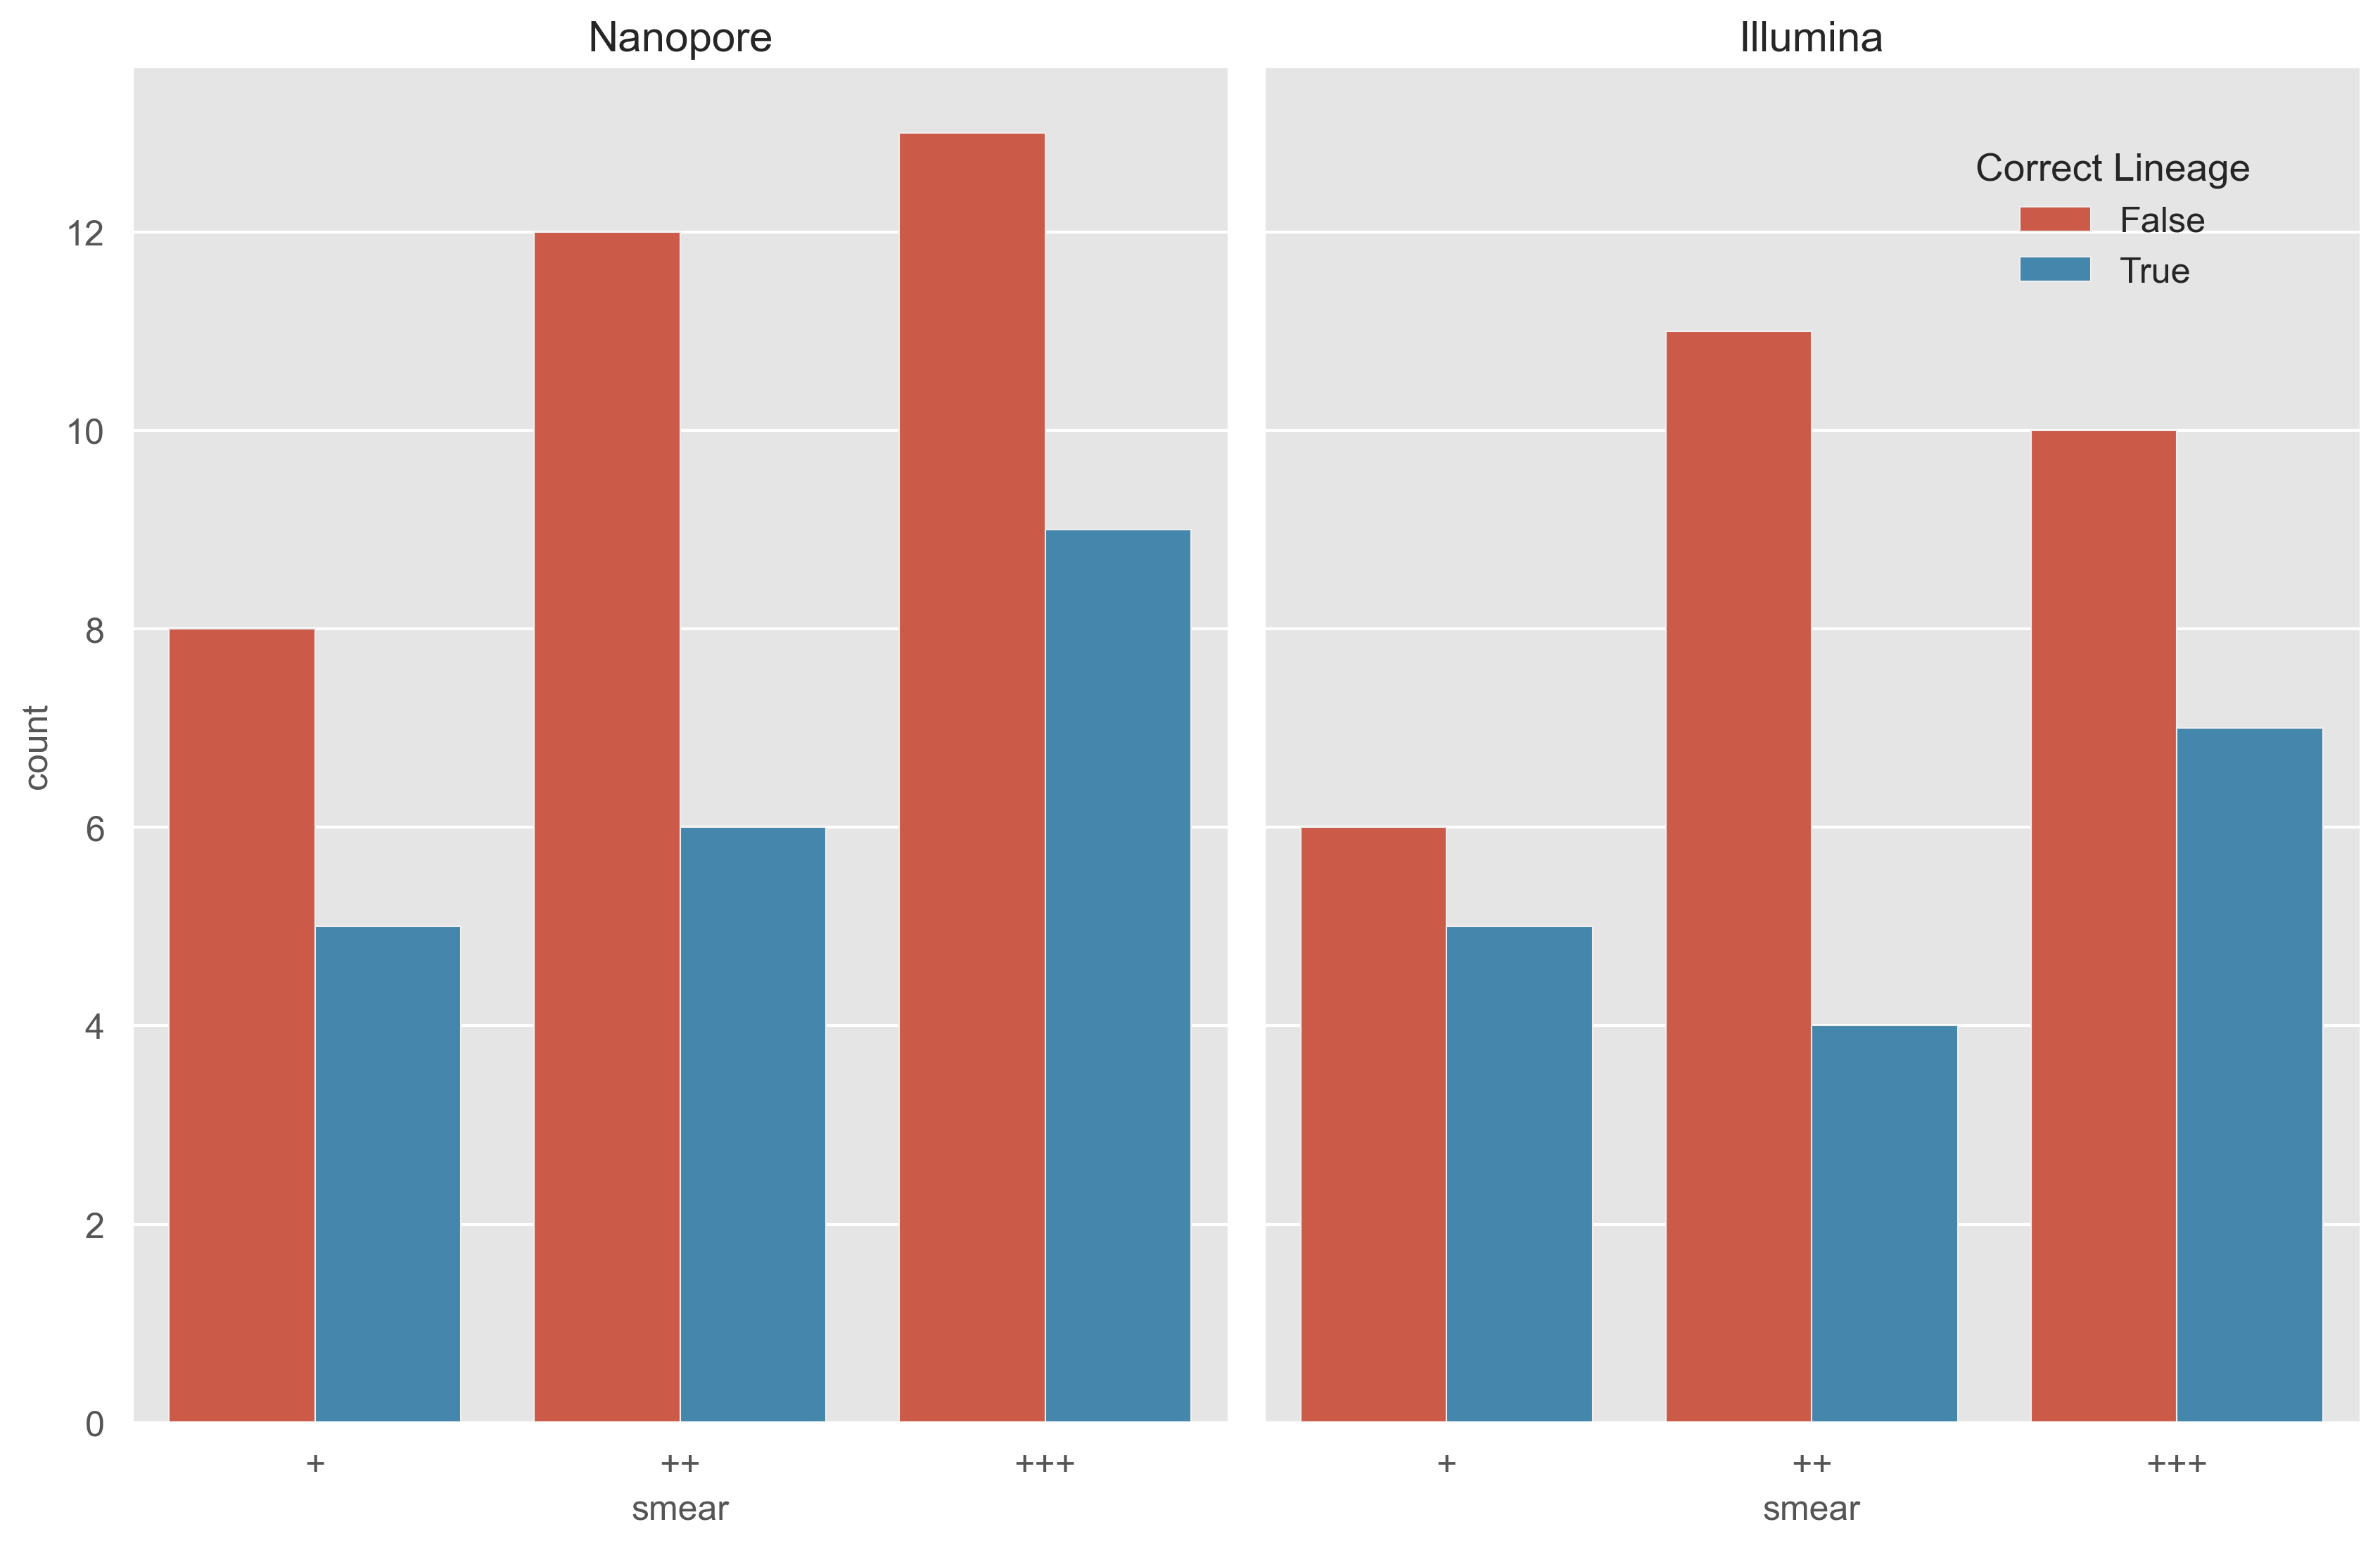

In [44]:
sns.set(font_scale=1.1)
plt.style.use("ggplot")
g = sns.catplot(data=data, x="smear", hue="correct_major", kind="count", col="technology", hue_order=[False, True])
g.fig.set_dpi(300)
for i in range(2):
    g.axes[0][i].set_title(g.axes[0][i].get_title().split("=")[-1].strip().capitalize())
g.legend.set(title="Correct Lineage")
g.fig.set_figheight(8)
g.fig.set_figwidth(13)
sns.move_legend(g, loc="upper right", bbox_to_anchor=(0.85, 0.9))


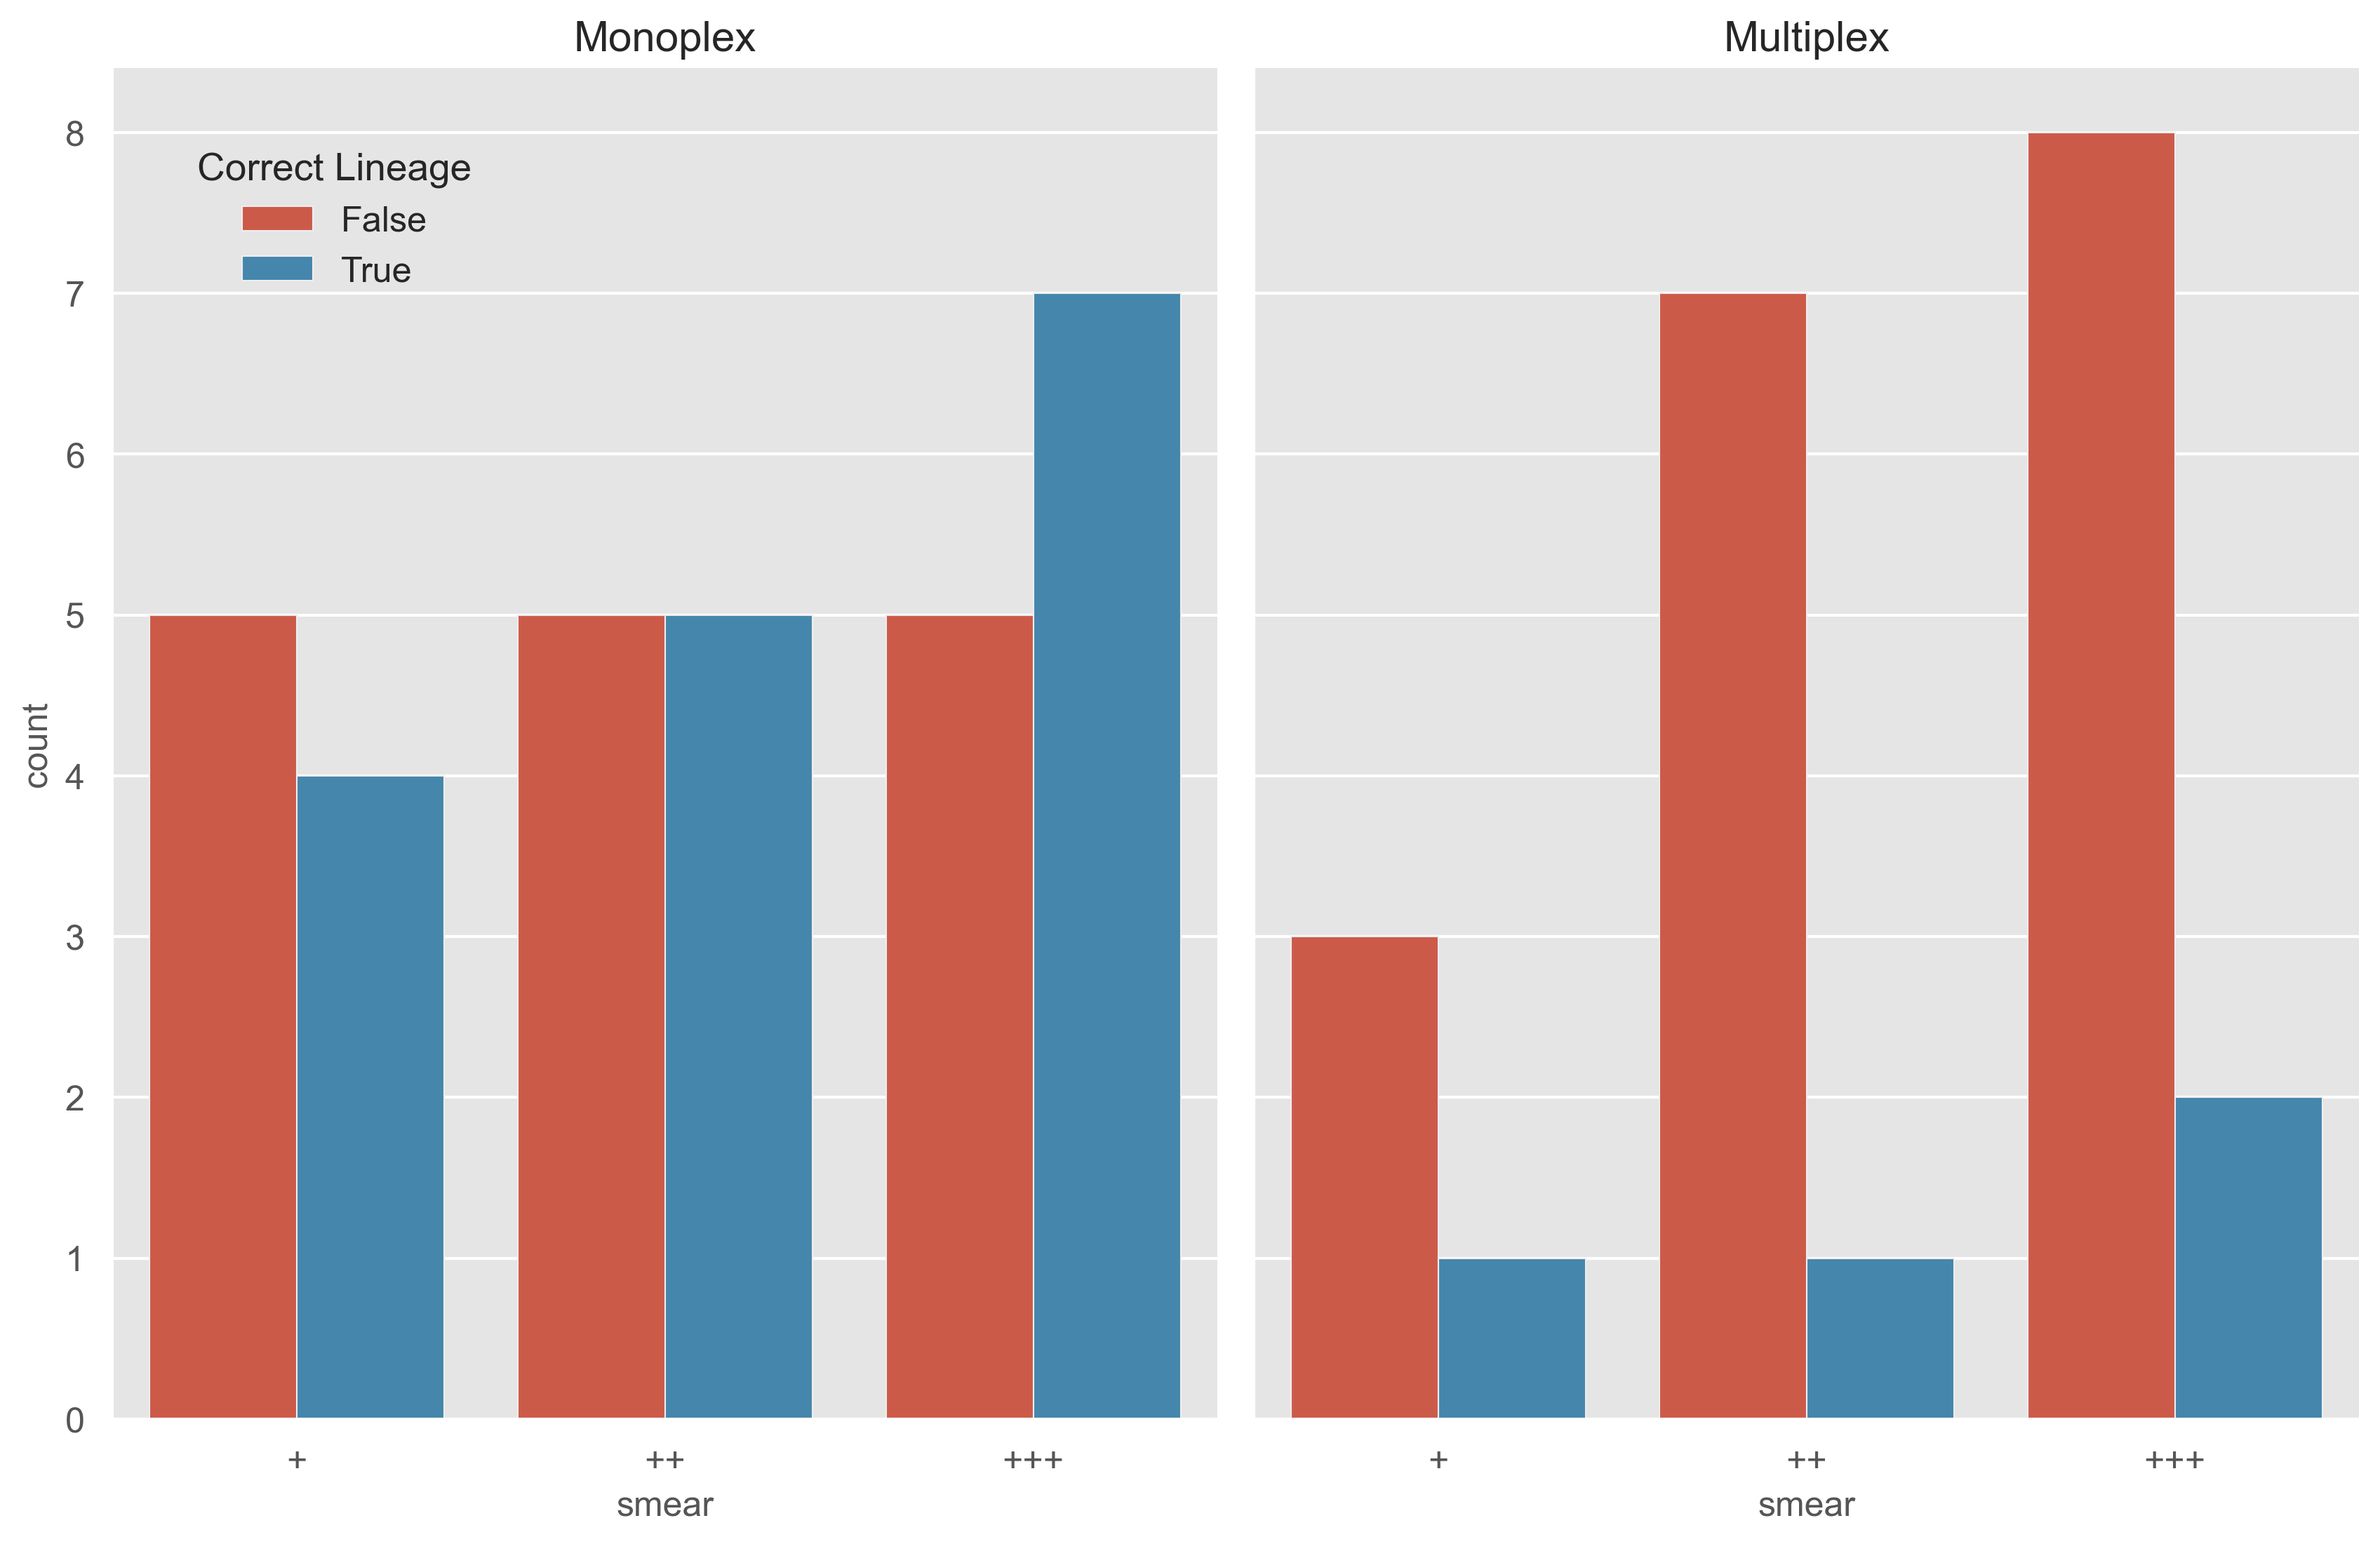

In [45]:
sns.set(font_scale=1.1)
plt.style.use("ggplot")
g = sns.catplot(data=data.query("technology=='nanopore'"), x="smear", hue="correct_major", kind="count", col="is_multiplex", hue_order=[False, True])
g.fig.set_dpi(300)
for i in range(2):
    title = g.axes[0][i].get_title()
    if title.strip().endswith("True"):
        new_title = "Multiplex"
    else:
        new_title = "Monoplex"
    g.axes[0][i].set_title(new_title)
    
g.legend.set(title="Correct Lineage")
g.fig.set_figheight(8)
g.fig.set_figwidth(13)
sns.move_legend(g, loc="upper right", bbox_to_anchor=(0.2, 0.9))

In [46]:
print(data.groupby(["technology", "is_multiplex", "correct_major"])["sample"].count().reset_index().T.to_markdown())

|               | 0        | 1        | 2        | 3        | 4        | 5        |
|:--------------|:---------|:---------|:---------|:---------|:---------|:---------|
| technology    | illumina | illumina | nanopore | nanopore | nanopore | nanopore |
| is_multiplex  | False    | False    | False    | False    | True     | True     |
| correct_major | False    | True     | False    | True     | False    | True     |
| sample        | 27       | 16       | 15       | 16       | 18       | 4        |


In [47]:
print(data.groupby(["technology", "is_multiplex", "correct_full"])["sample"].count().reset_index().T.to_markdown())

|              | 0        | 1        | 2        | 3        | 4        | 5        |
|:-------------|:---------|:---------|:---------|:---------|:---------|:---------|
| technology   | illumina | illumina | nanopore | nanopore | nanopore | nanopore |
| is_multiplex | False    | False    | False    | False    | True     | True     |
| correct_full | False    | True     | False    | True     | False    | True     |
| sample       | 27       | 16       | 15       | 16       | 19       | 3        |


In [48]:
print(data.groupby(["technology", "is_multiplex", "smear", "correct_full"])["sample"].count().reset_index().to_markdown(index=False))

| technology   | is_multiplex   | smear   | correct_full   |   sample |
|:-------------|:---------------|:--------|:---------------|---------:|
| illumina     | False          | +       | False          |        6 |
| illumina     | False          | +       | True           |        5 |
| illumina     | False          | ++      | False          |       11 |
| illumina     | False          | ++      | True           |        4 |
| illumina     | False          | +++     | False          |       10 |
| illumina     | False          | +++     | True           |        7 |
| nanopore     | False          | +       | False          |        5 |
| nanopore     | False          | +       | True           |        4 |
| nanopore     | False          | ++      | False          |        5 |
| nanopore     | False          | ++      | True           |        5 |
| nanopore     | False          | +++     | False          |        5 |
| nanopore     | False          | +++     | True           |    

In [49]:
data.groupby(["technology", "is_multiplex", "smear", "correct_full"])["sample"].count().reset_index().to_csv("lineage_summary.csv", index=False)

In [50]:
def legend_without_duplicate_labels(ax, title=""):
    handles, labels = ax.get_legend_handles_labels()
    labels = list(map(str.capitalize, labels))
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), title=title)

Text(0.5, 0, 'MTB read depth (mean)')

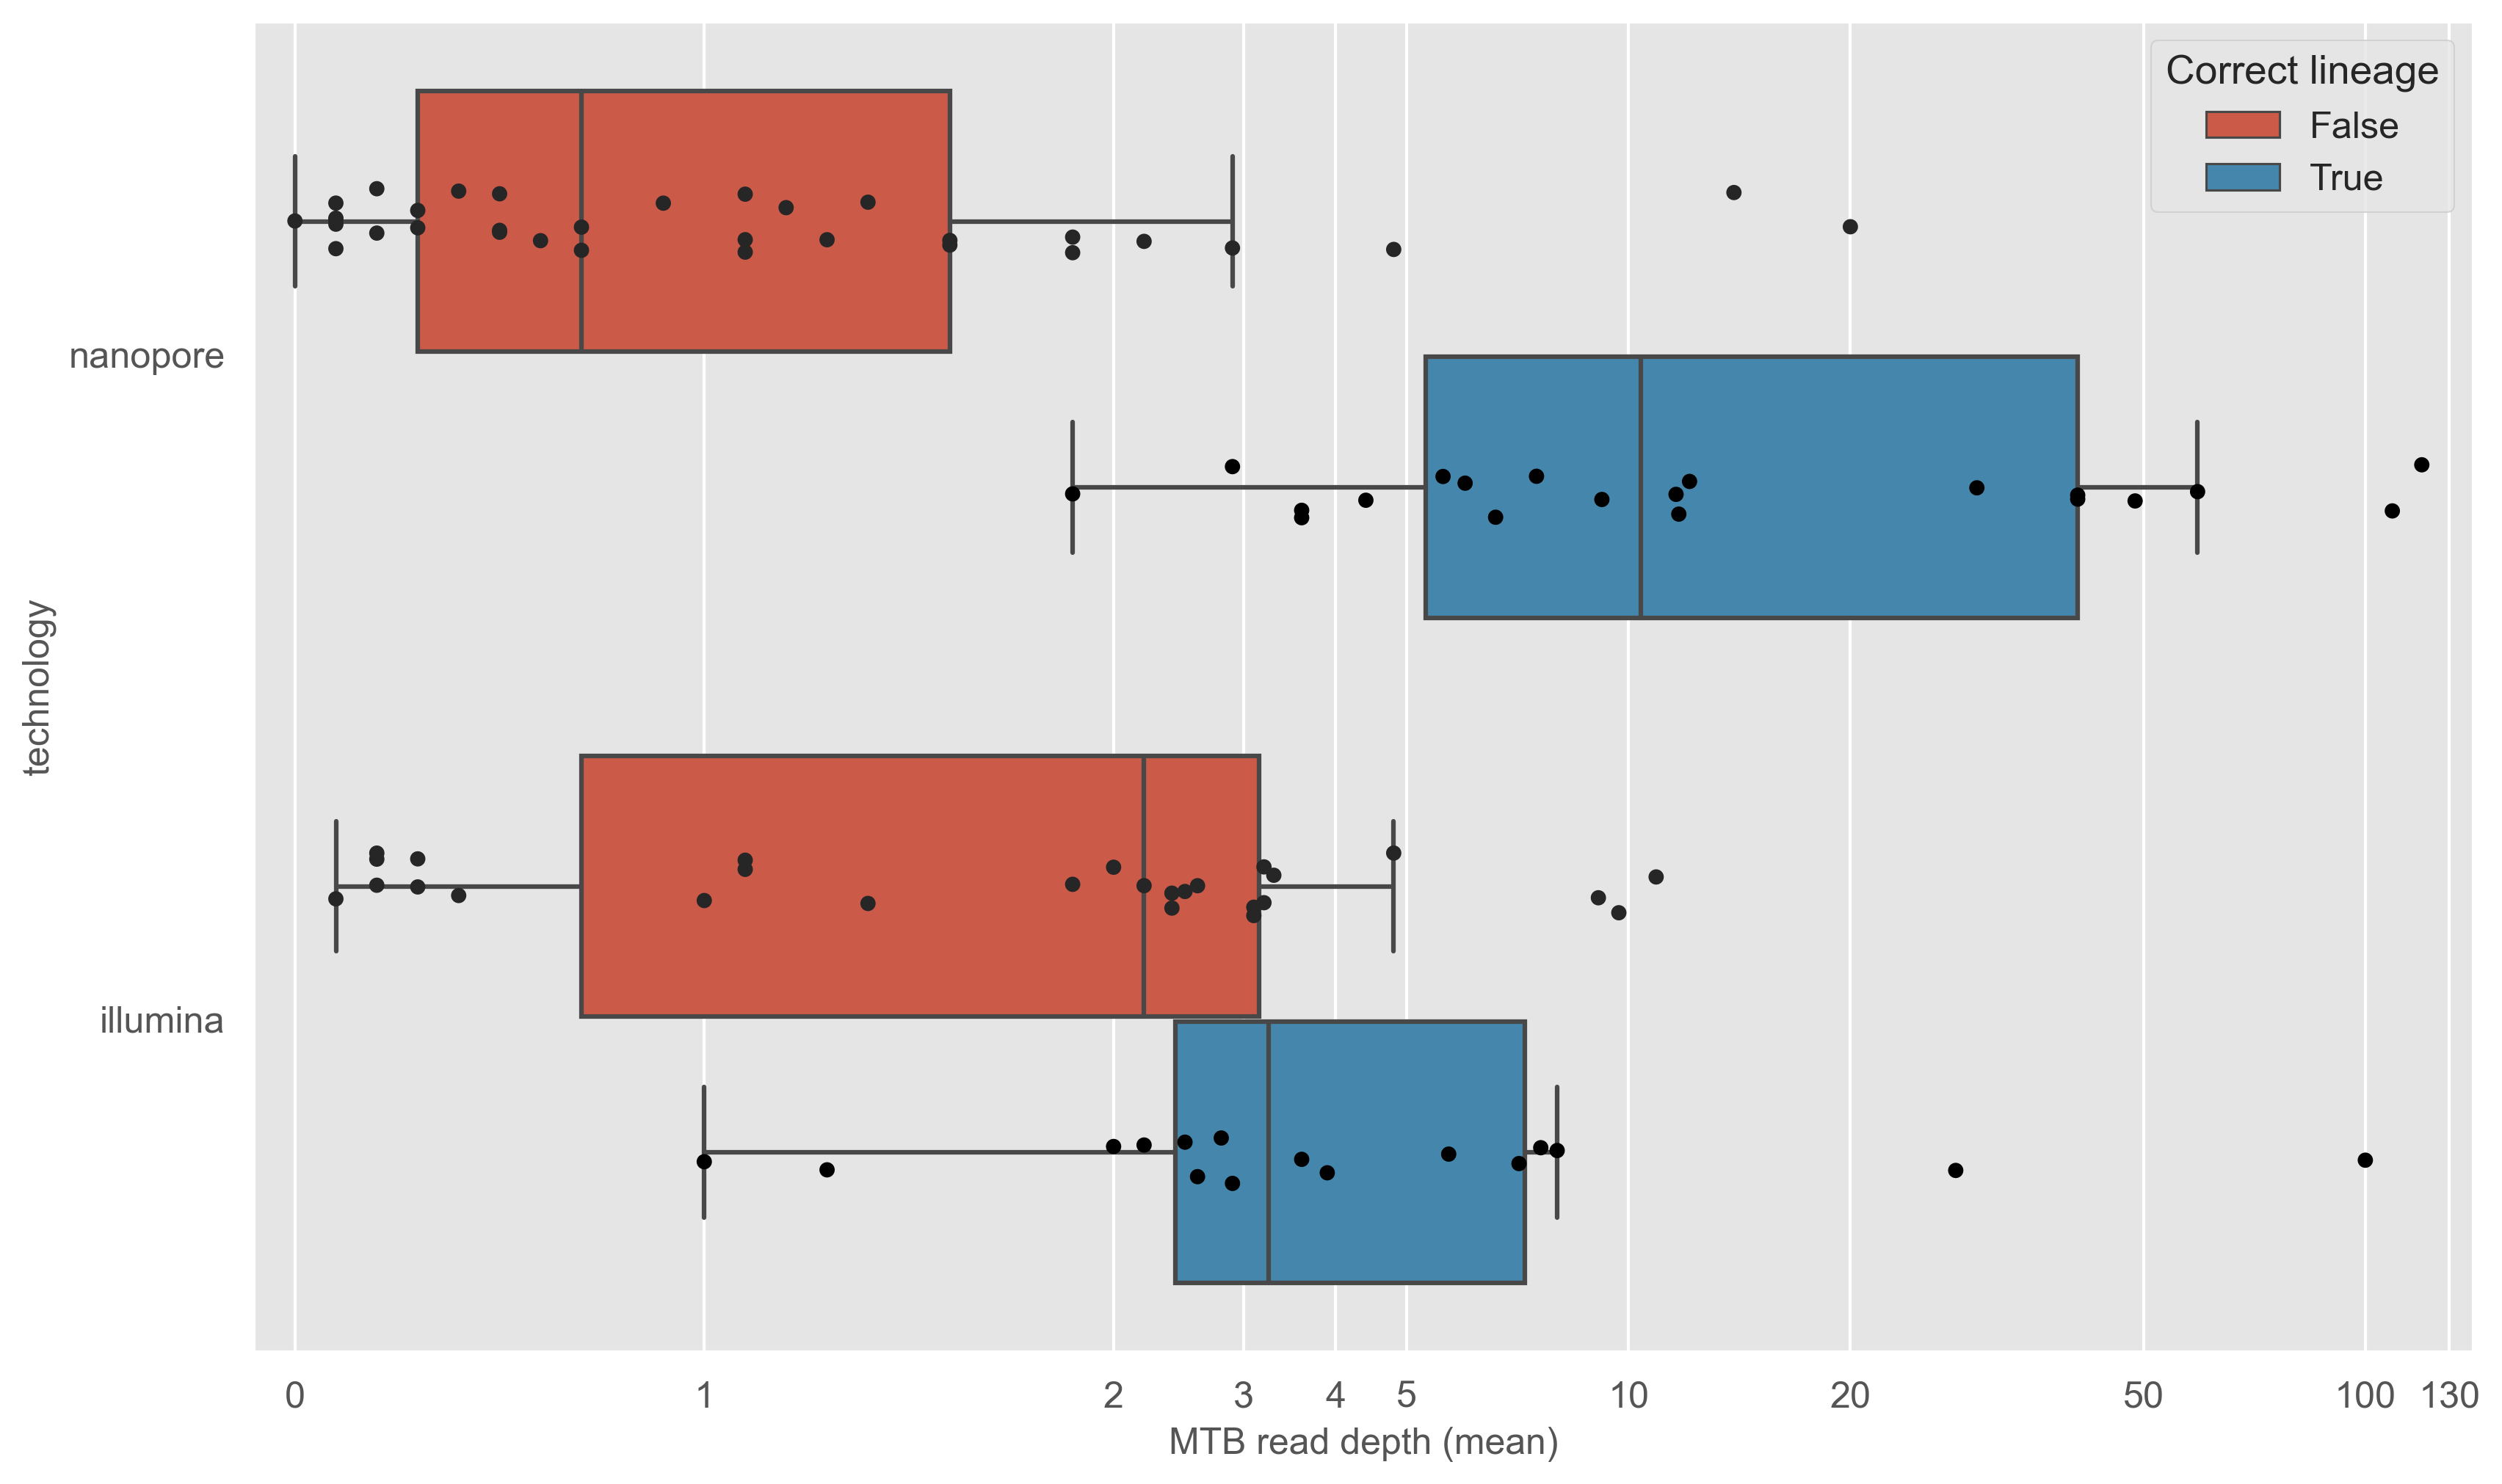

In [51]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
sns.boxplot(data=data, x="coverage", y="technology", hue="correct_major", fliersize=0, hue_order=[False, True])
sns.stripplot(data=data, x="coverage", y="technology", hue="correct_major", dodge=True, color="black", hue_order=[False, True])
xticks = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 130]
ax.set_xscale("symlog")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_xlim((-0.1, 140))
legend_without_duplicate_labels(ax, "Correct lineage")
ax.set_xlabel("MTB read depth (mean)")

In [28]:
lindf = comp_df[["sample", "lineage", "source", "technology", "smear", "is_multiplex", "species"]]

In [29]:
lindf.rename(columns={"sample":"name"}, inplace=True)

/usr/local/Caskroom/miniconda/base/envs/basecall-tb-sputum/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
lindf.to_csv("../../results/lineages.csv", index=False)

Do all cultured isolates get identified as MTB?

In [31]:
all(s == "Mycobacterium_tuberculosis" for s in lindf.query("source=='culture'")["species"])

True

In [32]:
culture_isolates = set(lindf.query("source=='culture'")["name"])

In [33]:
len(culture_isolates)

52

Counting all positive smear isolates, regardless of whether they had cultured sequencing

In [34]:
lindf.query("smear!='-'").groupby(["source", "technology", "is_multiplex", "species"]).count()

name  lineage  \
source  technology is_multiplex species                                     
culture illumina   False        Mycobacterium_tuberculosis    52       52   
sputum  illumina   False        Mycobacterium_tuberculosis    53       53   
                                Unknown                        6        6   
        nanopore   False        Mycobacterium_africanum        3        3   
                                Mycobacterium_tuberculosis    35       35   
                                Unknown                        4        4   
                   True         Mycobacterium_africanum        2        2   
                                Mycobacterium_tuberculosis    23       23   
                                Unknown                        5        5   

                                                            smear  
source  technology is_multiplex species                            
culture illumina   False        Mycobacterium_tuberculosis     52  
sputum  illumina   False        Mycobacterium_tuberculosis     53  
                                Unknown                         6  
        nanopore   False        Mycobacterium_africanum         3  
                                Mycobacterium_tuberculosis     35  
                                Unknown                         4  
                   True         Mycobacterium_africanum         2  
                                Mycobacterium_tuberculosis     23  
                                Unknown                         5

Counting only positive smear isolates that had cultured sequencing

In [35]:
lindf.query("smear!='-' and name in @culture_isolates").groupby(["source", "technology", "is_multiplex", "species"]).count()

name  lineage  \
source  technology is_multiplex species                                     
culture illumina   False        Mycobacterium_tuberculosis    52       52   
sputum  illumina   False        Mycobacterium_tuberculosis    47       47   
                                Unknown                        4        4   
        nanopore   False        Mycobacterium_africanum        3        3   
                                Mycobacterium_tuberculosis    30       30   
                                Unknown                        2        2   
                   True         Mycobacterium_africanum        2        2   
                                Mycobacterium_tuberculosis    22       22   
                                Unknown                        4        4   

                                                            smear  
source  technology is_multiplex species                            
culture illumina   False        Mycobacterium_tuberculosis     52  
sputum  illumina   False        Mycobacterium_tuberculosis     47  
                                Unknown                         4  
        nanopore   False        Mycobacterium_africanum         3  
                                Mycobacterium_tuberculosis     30  
                                Unknown                         2  
                   True         Mycobacterium_africanum         2  
                                Mycobacterium_tuberculosis     22  
                                Unknown                         4

In [36]:
lindf.query("smear=='-'").groupby(["source", "technology", "is_multiplex", "species"]).count()

name  lineage  \
source technology is_multiplex species                                     
sputum illumina   False        Mycobacterium_tuberculosis     7        7   
                               Unknown                        5        5   
       nanopore   False        Unknown                       12       12   
                  True         Unknown                        6        6   

                                                           smear  
source technology is_multiplex species                            
sputum illumina   False        Mycobacterium_tuberculosis      7  
                               Unknown                         5  
       nanopore   False        Unknown                        12  
                  True         Unknown                         6

In [37]:
lindf.query("smear=='-'")

,name,lineage,source,technology,smear,is_multiplex,species
36,PCtrl-1,Unknown,sputum,nanopore,-,True,Unknown
37,PCtrl-1,Unknown,sputum,nanopore,-,False,Unknown
38,PCtrl-2,Unknown,sputum,nanopore,-,False,Unknown
39,PCtrl-3,Unknown,sputum,nanopore,-,True,Unknown
40,PCtrl-3,Unknown,sputum,nanopore,-,False,Unknown
41,PCtrl-4,Unknown,sputum,nanopore,-,False,Unknown
42,PCtrl-5,Unknown,sputum,nanopore,-,True,Unknown
43,PCtrl-5,Unknown,sputum,nanopore,-,False,Unknown
44,PCtrl-6,Unknown,sputum,nanopore,-,False,Unknown
81,Test_NC1,Unknown,sputum,nanopore,-,True,Unknown
